In [1]:
"""
plot differet design of LArTPC's stats
@aurthor Jiancheng Zeng
@Oct 26 2021
"""

"\nplot differet design of LArTPC's stats\n@aurthor Jiancheng Zeng\n@Oct 26 2021\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [39]:
"""
index_pbar, dEOut_pbar, dEIn_pbar, time_pbar, angle_pbar, distance_pbar, PeD_pbar, PeD_pbar_z
"""

#anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_5e7_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/LITv2_Stop_anti_deuteron_1e8_Ene_0_600_vector.txt", delimiter = ' '))
#anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_5e7_Ene_0_1500_vector.txt", delimiter = ' '))

anti_proton_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/LITv1_Stop_anti_proton_1e8_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/LITv1_Stop_anti_deuteron_1e8_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/LITv1_Stop_anti_He3_1e8_Ene_0_1500_vector.txt", delimiter = ' '))

"""
set event name and event numbers
"""
First_design = 'LITv2'
Second_design = 'LITv1'
ORI_events = 5e7
LITv1_events = 5e7

print("Finish reading data!")

Finish reading data!


TPC 320cm Number of events more than 1.0m:307355(76%)
TPC 140cm Number of events more than 1.0m:80751(100%)


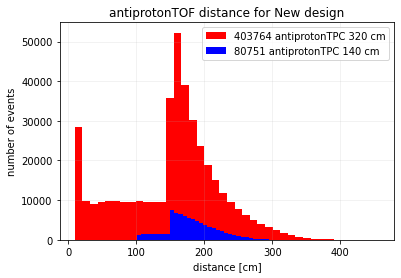

In [4]:
"""
distance in between TOF comparison for anti proton
"""
plt.hist(anti_proton_New[:,5], bins = 40, label = "%d antiprotonTPC 320 cm"%len(anti_proton_New[:,5][anti_proton_New[:, 5]>0]), color = 'r')
plt.hist(anti_proton_Old[:,5], bins = 40, label = "%d antiprotonTPC 140 cm"%len(anti_proton_Old[:,5]), color = 'b')
plt.title('antiprotonTOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
print("TPC 320cm Number of events more than 1.0m:"+str(len(anti_proton_New[:,5][anti_proton_New[:,5]>100]))+"("+str(int(100*len(anti_proton_New[:,5][anti_proton_New[:,5]>100])/len(anti_proton_New[:,5])))+"%)")
print("TPC 140cm Number of events more than 1.0m:"+str(len(anti_proton_Old[:,5][anti_proton_Old[:,5]>100]))+"("+str(int(100*len(anti_proton_Old[:,5][anti_proton_Old[:,5]>100])/len(anti_proton_Old[:,5])))+"%)")

TPC 320cm Number of events more than 1.0m:285314(77%)
TPC 140cm Number of events more than 1.0m:73136(100%)


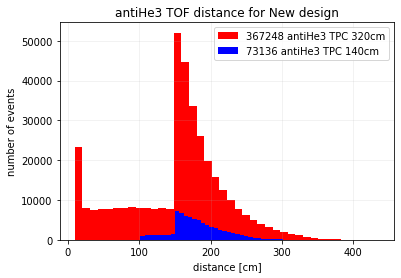

In [5]:
"""
distance in between TOF comparison for anti He3
"""
plt.hist(anti_He3_New[:,5], bins = 40, label = "%d antiHe3 TPC 320cm"%len(anti_He3_New[:,5][anti_He3_New[:,5]>0]), color = 'r')
plt.hist(anti_He3_Old[:,5], bins = 40, label = "%d antiHe3 TPC 140cm"%len(anti_He3_Old[:,5][anti_He3_Old[:,5]>0]), color = 'b')
plt.title('antiHe3 TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
print("TPC 320cm Number of events more than 1.0m:"+str(len(anti_He3_New[:,5][anti_He3_New[:,5]>100]))+"("+str(int(100*len(anti_He3_New[:,5][anti_He3_New[:,5]>100])/len(anti_He3_New[:,5])))+"%)")
print("TPC 140cm Number of events more than 1.0m:"+str(len(anti_He3_Old[:,5][anti_He3_Old[:,5]>100]))+"("+str(int(100*len(anti_He3_Old[:,5][anti_He3_Old[:,5]>100])/len(anti_He3_Old[:,5])))+"%)")

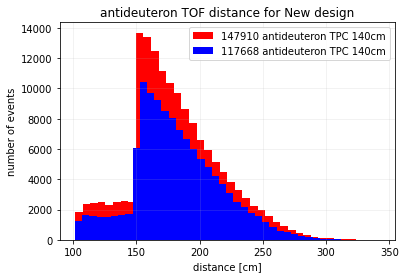

In [31]:
"""
distance in between TOF comparison for anti deuteron
"""
plt.hist(anti_deuteron_New[:,5], bins = 40, label = "%d antideuteron TPC 140cm"%len(anti_deuteron_New[:,5][anti_deuteron_New[:,5]>0]), color = 'r')
plt.hist(anti_deuteron_Old[:,5], bins = 40, label = "%d antideuteron TPC 140cm"%len(anti_deuteron_Old[:,5][anti_deuteron_Old[:,5]>0]), color = 'b')
plt.title('antideuteron TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

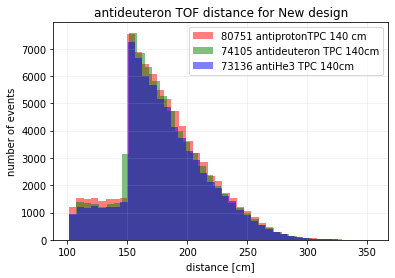

In [7]:
plt.hist(anti_proton_Old[:,5], bins = 40, label = "%d antiprotonTPC 140 cm"%len(anti_proton_Old[:,5]), color = 'r', alpha=0.5)
plt.hist(anti_deuteron_Old[:,5], bins = 40, label = "%d antideuteron TPC 140cm"%len(anti_deuteron_Old[:,5][anti_deuteron_Old[:,5]>0]), color = 'g', alpha=0.5)
plt.hist(anti_He3_Old[:,5], bins = 40, label = "%d antiHe3 TPC 140cm"%len(anti_He3_Old[:,5][anti_He3_Old[:,5]>0]), color = 'b', alpha=0.5)
plt.title('antideuteron TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

In [32]:
"""
set axis
"""
antiHe3X = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
antiHe3X = np.array(antiHe3X)/3

antiprotonX = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
antiprotonX = np.array(antiprotonX)/3

antideuteronX = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]
antideuteronX = np.array(antideuteronX)/2


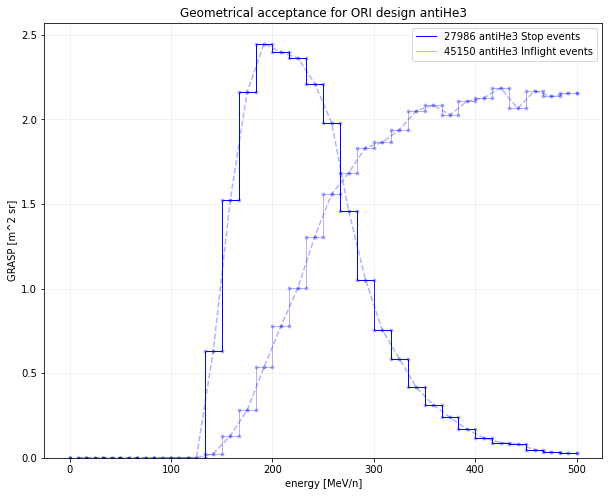

In [9]:
"""
1st design anti He3
"""

GRASP_anti_He3_Stop = [0] * 30
GRASP_anti_He3_Inflight = [0] * 30
anti_He3_Stop = anti_He3_Old[:,9][anti_He3_Old[:,10]==1]
anti_He3_Inflight = anti_He3_Old[:,9][anti_He3_Old[:,10]==0]
for i in range(30):
        GRASP_anti_He3_Stop[i] = 400 * math.pi * len(anti_He3_Stop[np.logical_and(anti_He3_Stop>i*50, anti_He3_Stop<(i+1)*50)])/(ORI_events/30)
        GRASP_anti_He3_Inflight[i] = 400 * math.pi * len(anti_He3_Inflight[np.logical_and(anti_He3_Inflight>i*50, anti_He3_Inflight<(i+1)*50)])/(ORI_events/30)

plt.figure(figsize=(10, 8))

centersantiHe3X = antiHe3X[:-1] + np.diff(antiHe3X) / 2
#antiHe3error = np.array(GRASP_anti_He3_Stop) ** 2
#print(antiHe3error)
#for n in range(len(antiHe3error)):
#    if(antiHe3error[n]>0.1):
#        antiHe3error[n] = 1/antiHe3error[n]

plt.stairs(GRASP_anti_He3_Stop , antiHe3X, baseline=None, label='%d antiHe3 Stop events'%len(anti_He3_Stop), color='b', alpha=0.99)
plt.plot(centersantiHe3X, GRASP_anti_He3_Stop, '.--', color='b', alpha=0.3)
plt.plot(np.repeat(antiHe3X, 2), np.hstack([GRASP_anti_He3_Stop[0], np.repeat(GRASP_anti_He3_Stop, 2), GRASP_anti_He3_Stop[-1]]),
         '.', color='b', alpha=0.23)
#plt.errorbar(centersantiHe3X, GRASP_anti_He3_Stop , color='r',  yerr = antiHe3error, ls = 'none')

antiHe3error = np.array(GRASP_anti_He3_Inflight) ** 2
plt.stairs(GRASP_anti_He3_Inflight , antiHe3X, baseline=None, label='%d antiHe3 Inflight events'%len(anti_He3_Inflight), color='b', alpha=0.3)
plt.plot(centersantiHe3X, GRASP_anti_He3_Inflight, '.--', color='b', alpha=0.3)
plt.plot(np.repeat(antiHe3X, 2), np.hstack([GRASP_anti_He3_Inflight[0], np.repeat(GRASP_anti_He3_Inflight, 2), GRASP_anti_He3_Inflight[-1]]),
         '.', color='b', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antiHe3'%First_design)
plt.savefig("./Geometrical acceptance.jpg")


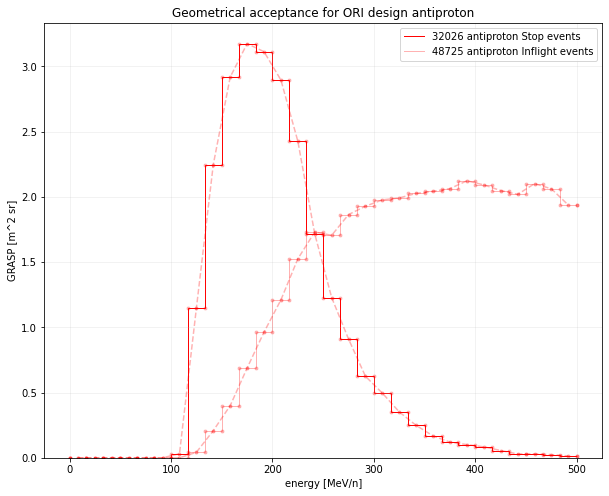

In [10]:
"""
1st design anti proton
"""

GRASP_anti_proton_Stop = [0] * 30
GRASP_anti_proton_Inflight = [0] * 30
anti_proton_Stop = anti_proton_Old[:,9][anti_proton_Old[:,10]==1]
anti_proton_Inflight = anti_proton_Old[:,9][anti_proton_Old[:,10]==0]
for i in range(30):
        GRASP_anti_proton_Stop[i] = 400 * math.pi * len(anti_proton_Stop[np.logical_and(anti_proton_Stop>i*(50/3), anti_proton_Stop<(i+1)*(50/3))])/(ORI_events/30)
        GRASP_anti_proton_Inflight[i] = 400 * math.pi * len(anti_proton_Inflight[np.logical_and(anti_proton_Inflight>i*(50/3), anti_proton_Inflight<(i+1)*(50/3))])/(ORI_events/30)

plt.figure(figsize=(10, 8))

centersantiprotonX = antiprotonX[:-1] + np.diff(antiprotonX) / 2

antiprotonerror = np.array(GRASP_anti_proton_Stop) ** 2
plt.stairs(GRASP_anti_proton_Stop , antiprotonX, baseline=None, label='%d antiproton Stop events'%len(anti_proton_Stop), color='r', alpha=0.99)
plt.plot(centersantiprotonX, GRASP_anti_proton_Stop, '.--', color='r', alpha=0.3)
plt.plot(np.repeat(antiprotonX, 2), np.hstack([GRASP_anti_proton_Stop[0], np.repeat(GRASP_anti_proton_Stop, 2), GRASP_anti_proton_Stop[-1]]),
         '.', color='r', alpha=0.23)
#plt.errorbar(centersantiprotonX, GRASP_anti_proton_Stop , color='r',  yerr = antiprotonerror, ls = 'none')

antiprotonerror = np.array(GRASP_anti_proton_Inflight) ** 2
plt.stairs(GRASP_anti_proton_Inflight , antiprotonX, baseline=None, label='%d antiproton Inflight events'%len(anti_proton_Inflight), color='r', alpha=0.3)
plt.plot(centersantiprotonX, GRASP_anti_proton_Inflight, '.--', color='r', alpha=0.3)
plt.plot(np.repeat(antiprotonX, 2), np.hstack([GRASP_anti_proton_Inflight[0], np.repeat(GRASP_anti_proton_Inflight, 2), GRASP_anti_proton_Inflight[-1]]),
         '.', color='r', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antiproton'%First_design)
plt.savefig("./Geometrical acceptance.jpg")

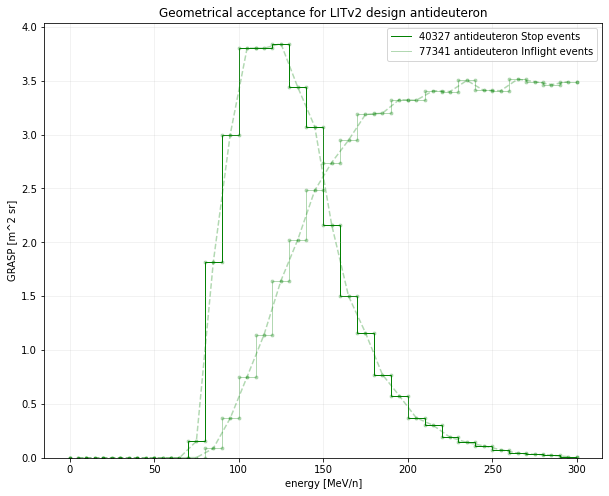

In [40]:
"""
1st design anti deuteron
"""

GRASP_anti_deuteron_Stop = [0] * 30
GRASP_anti_deuteron_Inflight = [0] * 30
anti_deuteron_Stop = anti_deuteron_Old[:,9][anti_deuteron_Old[:,10]==1]
anti_deuteron_Inflight = anti_deuteron_Old[:,9][anti_deuteron_Old[:,10]==0]
for i in range(30):
        GRASP_anti_deuteron_Stop[i] = 400 * math.pi * len(anti_deuteron_Stop[np.logical_and(anti_deuteron_Stop>i*20, anti_deuteron_Stop<(i+1)*20)])/(ORI_events/30)
        GRASP_anti_deuteron_Inflight[i] = 400 * math.pi * len(anti_deuteron_Inflight[np.logical_and(anti_deuteron_Inflight>i*20, anti_deuteron_Inflight<(i+1)*20)])/(ORI_events/30)

plt.figure(figsize=(10, 8))

centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2
antideuteronerror = np.array(GRASP_anti_deuteron_Stop) ** 2
plt.stairs(GRASP_anti_deuteron_Stop , antideuteronX, baseline=None, label='%d antideuteron Stop events'%len(anti_deuteron_Stop), color='g', alpha=0.99)
plt.plot(centersantideuteronX, GRASP_anti_deuteron_Stop, '.--', color='g', alpha=0.3)
plt.plot(np.repeat(antideuteronX, 2), np.hstack([GRASP_anti_deuteron_Stop[0], np.repeat(GRASP_anti_deuteron_Stop, 2), GRASP_anti_deuteron_Stop[-1]]),
         '.', color='g', alpha=0.23)

centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2
antideuteronerror = np.array(GRASP_anti_deuteron_Inflight) ** 2
plt.stairs(GRASP_anti_deuteron_Inflight , antideuteronX, baseline=None, label='%d antideuteron Inflight events'%len(anti_deuteron_Inflight), color='g', alpha=0.3)
plt.plot(centersantideuteronX, GRASP_anti_deuteron_Inflight, '.--', color='g', alpha=0.3)
plt.plot(np.repeat(antideuteronX, 2), np.hstack([GRASP_anti_deuteron_Inflight[0], np.repeat(GRASP_anti_deuteron_Inflight, 2), GRASP_anti_deuteron_Inflight[-1]]),
         '.', color='g', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antideuteron'%First_design)
plt.savefig("./Geometrical acceptance.jpg")

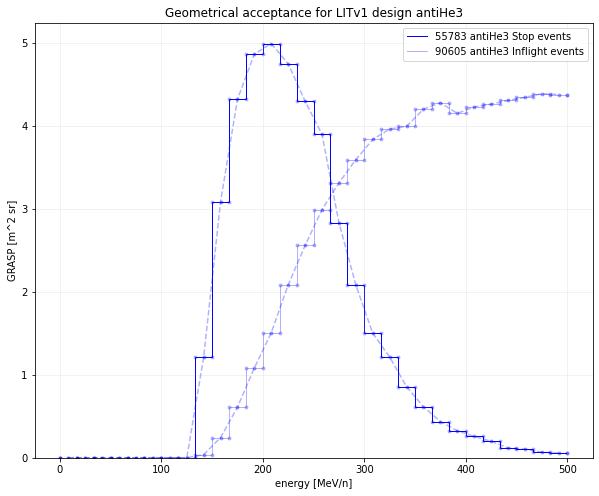

In [41]:
"""
2nd design anti He3
"""

GRASP_anti_He3_M_Stop = [0] * 30
GRASP_anti_He3_M_Inflight = [0] * 30
anti_He3_M_Stop = anti_He3_New[:,9][anti_He3_New[:,10]==1]
anti_He3_M_Inflight = anti_He3_New[:,9][anti_He3_New[:,10]==0]
for i in range(30):
        GRASP_anti_He3_M_Stop[i] = 400 * math.pi * len(anti_He3_M_Stop[np.logical_and(anti_He3_M_Stop>i*50, anti_He3_M_Stop<(i+1)*50)])/(LITv1_events/30)
        GRASP_anti_He3_M_Inflight[i] = 400 * math.pi * len(anti_He3_M_Inflight[np.logical_and(anti_He3_M_Inflight>i*50, anti_He3_M_Inflight<(i+1)*50)])/(LITv1_events/30)

plt.figure(figsize=(10, 8))
centersantiHe3X = antiHe3X[:-1] + np.diff(antiHe3X) / 2
antiHe3error = np.array(GRASP_anti_He3_M_Stop) ** 2
plt.stairs(GRASP_anti_He3_M_Stop , antiHe3X, baseline=None, label='%d antiHe3 Stop events'%len(anti_He3_M_Stop), color='b', alpha=0.99)
plt.plot(centersantiHe3X, GRASP_anti_He3_M_Stop, '.--', color='b', alpha=0.3)
plt.plot(np.repeat(antiHe3X, 2), np.hstack([GRASP_anti_He3_M_Stop[0], np.repeat(GRASP_anti_He3_M_Stop, 2), GRASP_anti_He3_M_Stop[-1]]),
         '.', color='b', alpha=0.23)

centersantiHe3X = antiHe3X[:-1] + np.diff(antiHe3X) / 2
antiHe3error = np.array(GRASP_anti_He3_M_Inflight) ** 2
plt.stairs(GRASP_anti_He3_M_Inflight , antiHe3X, baseline=None, label='%d antiHe3 Inflight events'%len(anti_He3_M_Inflight), color='b', alpha=0.3)
plt.plot(centersantiHe3X, GRASP_anti_He3_M_Inflight, '.--', color='b', alpha=0.3)
plt.plot(np.repeat(antiHe3X, 2), np.hstack([GRASP_anti_He3_M_Inflight[0], np.repeat(GRASP_anti_He3_M_Inflight, 2), GRASP_anti_He3_M_Inflight[-1]]),
         '.', color='b', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antiHe3'%Second_design)
plt.savefig("./Geometrical acceptance.jpg")


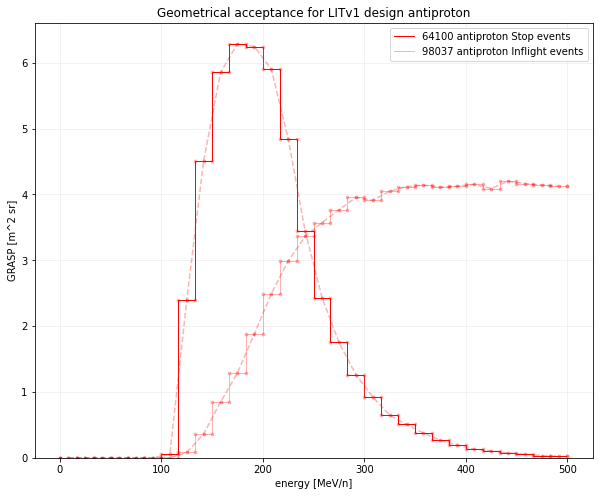

In [42]:
"""
2nd design anti proton
"""
GRASP_anti_proton_M_Stop = [0] * 30
GRASP_anti_proton_M_Inflight = [0] * 30
anti_proton_M_Stop = anti_proton_New[:,9][anti_proton_New[:,10]==1]
anti_proton_M_Inflight = anti_proton_New[:,9][anti_proton_New[:,10]==0]
for i in range(30):
        GRASP_anti_proton_M_Stop[i] = 400 * math.pi * len(anti_proton_M_Stop[np.logical_and(anti_proton_M_Stop>i*(50/3), anti_proton_M_Stop<(i+1)*(50/3))])/(LITv1_events/30)
        GRASP_anti_proton_M_Inflight[i] = 400 * math.pi * len(anti_proton_M_Inflight[np.logical_and(anti_proton_M_Inflight>i*(50/3), anti_proton_M_Inflight<(i+1)*(50/3))])/(LITv1_events/30)

plt.figure(figsize=(10, 8))
centersantiprotonX = antiprotonX[:-1] + np.diff(antiprotonX) / 2
antiprotonerror = np.array(GRASP_anti_proton_M_Stop) ** 2
plt.stairs(GRASP_anti_proton_M_Stop , antiprotonX, baseline=None, label='%d antiproton Stop events'%len(anti_proton_M_Stop), color='r', alpha=0.99)
plt.plot(centersantiprotonX, GRASP_anti_proton_M_Stop, '.--', color='r', alpha=0.3)
plt.plot(np.repeat(antiprotonX, 2), np.hstack([GRASP_anti_proton_M_Stop[0], np.repeat(GRASP_anti_proton_M_Stop, 2), GRASP_anti_proton_M_Stop[-1]]),
         '.', color='r', alpha=0.23)

centersantiprotonX = antiprotonX[:-1] + np.diff(antiprotonX) / 2
antiprotonerror = np.array(GRASP_anti_proton_M_Inflight) ** 2
plt.stairs(GRASP_anti_proton_M_Inflight , antiprotonX, baseline=None, label='%d antiproton Inflight events'%len(anti_proton_M_Inflight), color='r', alpha=0.3)
plt.plot(centersantiprotonX, GRASP_anti_proton_M_Inflight, '.--', color='r', alpha=0.3)
plt.plot(np.repeat(antiprotonX, 2), np.hstack([GRASP_anti_proton_M_Inflight[0], np.repeat(GRASP_anti_proton_M_Inflight, 2), GRASP_anti_proton_M_Inflight[-1]]),
         '.', color='r', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antiproton'%Second_design)
plt.savefig("./Geometrical acceptance.jpg")

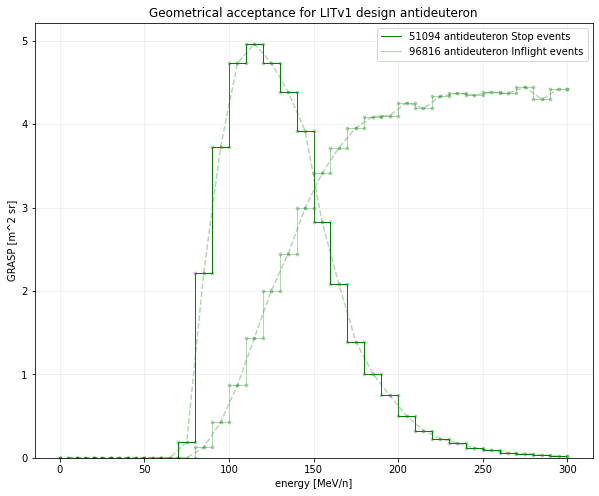

In [43]:
"""
2nd design anti deuteron
"""
GRASP_anti_deuteron_M_Stop = [0] * 30
GRASP_anti_deuteron_M_Inflight = [0] * 30
anti_deuteron_M_Stop = anti_deuteron_New[:,9][anti_deuteron_New[:,10]==1]
anti_deuteron_M_Inflight = anti_deuteron_New[:,9][anti_deuteron_New[:,10]==0]
for i in range(30):
        GRASP_anti_deuteron_M_Stop[i] = 400 * math.pi * len(anti_deuteron_M_Stop[np.logical_and(anti_deuteron_M_Stop>i*20, anti_deuteron_M_Stop<(i+1)*20)])/(LITv1_events/30)
        GRASP_anti_deuteron_M_Inflight[i] = 400 * math.pi * len(anti_deuteron_M_Inflight[np.logical_and(anti_deuteron_M_Inflight>i*20, anti_deuteron_M_Inflight<(i+1)*20)])/(LITv1_events/30)

plt.figure(figsize=(10, 8))

centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2
antideuteronerror = np.array(GRASP_anti_deuteron_M_Stop) ** 2
plt.stairs(GRASP_anti_deuteron_M_Stop , antideuteronX, baseline=None, label='%d antideuteron Stop events'%len(anti_deuteron_M_Stop), color='g', alpha=0.99)
plt.plot(centersantideuteronX, GRASP_anti_deuteron_M_Stop, '.--', color='g', alpha=0.3)
plt.plot(np.repeat(antideuteronX, 2), np.hstack([GRASP_anti_deuteron_M_Stop[0], np.repeat(GRASP_anti_deuteron_M_Stop, 2), GRASP_anti_deuteron_M_Stop[-1]]),
         '.', color='g', alpha=0.23)

centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2
antideuteronerror = np.array(GRASP_anti_deuteron_M_Inflight) ** 2
plt.stairs(GRASP_anti_deuteron_M_Inflight , antideuteronX, baseline=None, label='%d antideuteron Inflight events'%len(anti_deuteron_M_Inflight), color='g', alpha=0.3)
plt.plot(centersantideuteronX, GRASP_anti_deuteron_M_Inflight, '.--', color='g', alpha=0.3)
plt.plot(np.repeat(antideuteronX, 2), np.hstack([GRASP_anti_deuteron_M_Inflight[0], np.repeat(GRASP_anti_deuteron_M_Inflight, 2), GRASP_anti_deuteron_M_Inflight[-1]]),
         '.', color='g', alpha=0.23)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance for %s design antideuteron'%Second_design)
plt.savefig("./Geometrical acceptance.jpg")

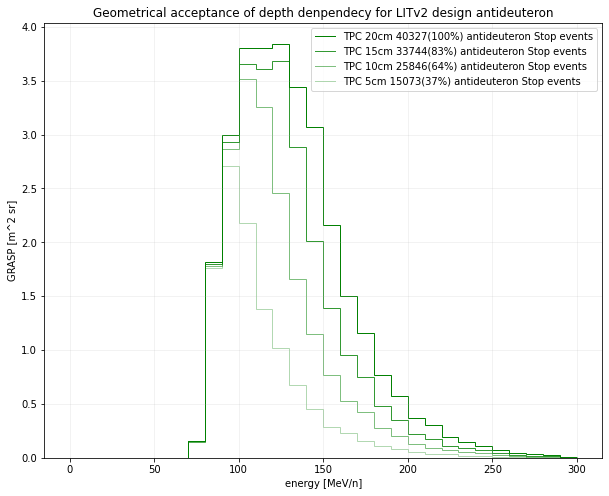

In [44]:
"""
ORI design anti deuteron GRASP depth dependency
"""

GRASP_anti_deuteron_Stop_5 = [0] * 30
anti_deuteron_Stop_5 = anti_deuteron_Old[:,9][np.logical_and(anti_deuteron_Old[:,10]==1, anti_deuteron_Old[:,7]<5)]
for i in range(30):
        GRASP_anti_deuteron_Stop_5[i] = 400 * math.pi * len(anti_deuteron_Stop_5[np.logical_and(anti_deuteron_Stop_5>i*20, anti_deuteron_Stop_5<(i+1)*20)])/(ORI_events/30)

GRASP_anti_deuteron_Stop_10 = [0] * 30
anti_deuteron_Stop_10 = anti_deuteron_Old[:,9][np.logical_and(anti_deuteron_Old[:,10]==1, anti_deuteron_Old[:,7]<10)]
for i in range(30):
        GRASP_anti_deuteron_Stop_10[i] = 400 * math.pi * len(anti_deuteron_Stop_10[np.logical_and(anti_deuteron_Stop_10>i*20, anti_deuteron_Stop_10<(i+1)*20)])/(ORI_events/30)

GRASP_anti_deuteron_Stop_15 = [0] * 30
anti_deuteron_Stop_15 = anti_deuteron_Old[:,9][np.logical_and(anti_deuteron_Old[:,10]==1, anti_deuteron_Old[:,7]<15)]
for i in range(30):
        GRASP_anti_deuteron_Stop_15[i] = 400 * math.pi * len(anti_deuteron_Stop_15[np.logical_and(anti_deuteron_Stop_15>i*20, anti_deuteron_Stop_15<(i+1)*20)])/(ORI_events/30)

plt.figure(figsize=(10, 8))

centersantideuteronX = antideuteronX[:-1] + np.diff(antideuteronX) / 2

plt.stairs(GRASP_anti_deuteron_Stop , antideuteronX, baseline=None, label="TPC 20cm %d(%d%%) antideuteron Stop events"%(len(anti_deuteron_Stop), 100*len(anti_deuteron_Stop)/len(anti_deuteron_Stop)), color='g', alpha=0.99)
plt.stairs(GRASP_anti_deuteron_Stop_15 , antideuteronX, baseline=None, label='TPC 15cm %d(%d%%) antideuteron Stop events'%(len(anti_deuteron_Stop_15), 100*len(anti_deuteron_Stop_15)/len(anti_deuteron_Stop)), color='g', alpha=0.80)
plt.stairs(GRASP_anti_deuteron_Stop_10 , antideuteronX, baseline=None, label='TPC 10cm %d(%d%%) antideuteron Stop events'%(len(anti_deuteron_Stop_10), 100*len(anti_deuteron_Stop_10)/len(anti_deuteron_Stop)), color='g', alpha=0.50)
plt.stairs(GRASP_anti_deuteron_Stop_5 , antideuteronX, baseline=None, label='TPC 5cm %d(%d%%) antideuteron Stop events'%(len(anti_deuteron_Stop_5), 100*len(anti_deuteron_Stop_5)/len(anti_deuteron_Stop)), color='g', alpha=0.30)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance of depth denpendecy for %s design antideuteron'%First_design)
plt.savefig("./Geometrical acceptance.jpg")

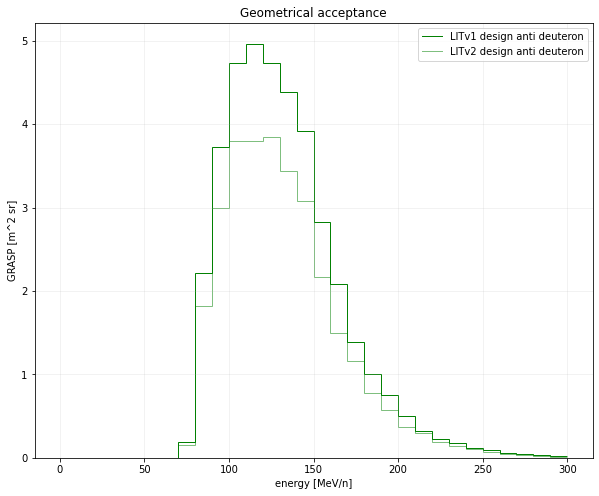

<Figure size 432x288 with 0 Axes>

In [47]:
"""
Comparison plot
"""
plt.figure(figsize=(10, 8))

#plt.stairs(GRASP_anti_He3_M_Stop , antiHe3X, baseline=None, label='%s design anti He3'%Second_design, color='b', alpha=0.99)
plt.stairs(GRASP_anti_deuteron_M_Stop , antideuteronX, baseline=None, label='%s design anti deuteron'%Second_design, color='g', alpha=0.99)
#plt.stairs(GRASP_anti_proton_M_Stop , antiprotonX, baseline=None, label='%s design anti proton'%Second_design, color='r', alpha=0.99)

#plt.stairs(GRASP_anti_He3_Stop , antiHe3X, baseline=None, label='%s design anti He3'%First_design, color='b', alpha=0.5)
plt.stairs(GRASP_anti_deuteron_Stop , antideuteronX, baseline=None, label='%s design anti deuteron'%First_design, color='g', alpha=0.5)
#plt.stairs(GRASP_anti_proton_Stop , antiprotonX, baseline=None, label='%s design anti proton'%First_design, color='r', alpha=0.5)

plt.xlabel("energy [MeV/n]")
plt.ylabel("GRASP [m^2 sr]")
plt.legend()
plt.grid(alpha=0.2)
plt.title('Geometrical acceptance')
plt.show()
plt.savefig("./Geometrical acceptance.jpg")